#Análisis del Problema

El conjunto de datos contiene información de datos de escaneo minorista que muestra información semanal de ventas minoristas de aguacates Hass en 2018. Estos datos provienen directamente de los registros de caja de los minoristas y reflejan las ventas reales de aguacates Hass en varios canales minoristas, incluyendo supermercados, tiendas de descuento, clubes de compras, farmacias, tiendas de dólar y ventas militares. Se pretende predecir el precio del aguacate.

## Descarga de los archivos de datos:
https://drive.google.com/file/d/1dXf5IEFrOdG3D2KiJyl2RGtZvpMTI_o_/view?usp=sharing

### Autores
* Andrey Marín Chacón
* David González Agüero

#Entendimiento de los datos

El presente conjunto de datos contiene las siguientes características:

* **Date**: La fecha de la observación, que indica la semana en la que se registraron las ventas.
* **AveragePrice**: El costo promedio de un solo aguacate.
* **Type**: Indica si los aguacates son convencionales o orgánicos, lo que refleja el método de cultivo o producción.
* **Year**:  El año al que pertenecen los datos, que es 2018 en este caso.
* **Region**:  La ciudad o región en la que se registraron las ventas de aguacates. Esto indica dónde se llevaron a cabo las observaciones.
* **Total Volume**: El número total de aguacates vendidos en la semana específica que se está observando.
* **4046, 4225 y 4770**: Estos son códigos de producto específicos (PLU's) para aguacates Hass. Cada uno de estos valores representa el número total de aguacates vendidos con un PLU específico (4046, 4225 o 4770) en la semana correspondiente.


#Exploración de los datos

## Imports

In [ ]:
import pandas as pd
import numpy as np
import joblib

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
#from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

## Funciones

In [ ]:
# Función necesaria para la fecha. Clasificar la fecha en las 4 estaciones.
def map_month_to_season(month_name):
    if month_name in ['March', 'April', 'May']:
        return 'Spring'
    elif month_name in ['June', 'July', 'August']:
        return 'Summer'
    elif month_name in ['September', 'October', 'November']:
        return 'Autumn'
    else:
        return 'Winter'

##1. Lectura del conjunto de datos

In [ ]:
df = pd.read_csv("sample_data/avocado.csv")

##2. Visualización preliminar de la información

In [ ]:
df.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [ ]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Ejecutando el siguiente comando para corroborar si existen o no valores nulos, nos muestra en el resultado una lista vacia, lo que significa que en este dataset no existen nulos.

In [ ]:
# Comprobación de si existen valores nulos
is_null = df.isna().any()
is_null[is_null]

Series([], dtype: bool)

Tampoco existen valores infinitos. Ya que de manera similar al caso anterior con los nulos, nos retorna una lista vacía.

In [ ]:
# Comprobación de la existencia de valores infinitos
is_inf = df.isin([np.inf, -np.inf]).any()
is_inf[is_inf]

Series([], dtype: bool)

In [ ]:
df.Date = pd.to_datetime(df.Date)
df.Date

0       2015-12-27
1       2015-12-20
2       2015-12-13
3       2015-12-06
4       2015-11-29
           ...    
18244   2018-02-04
18245   2018-01-28
18246   2018-01-21
18247   2018-01-14
18248   2018-01-07
Name: Date, Length: 18249, dtype: datetime64[ns]

In [ ]:
df = df.assign(
    order_month = df.Date.dt.month_name(),
    order_week_of_the_year =  df.Date.dt.weekofyear,
    order_year = df.Date.dt.year
)
df.shape

<ipython-input-208-d33f43c5e2ea>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  order_week_of_the_year =  df.Date.dt.weekofyear,


(18249, 17)

In [ ]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,order_month,order_week_of_the_year,order_year
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,December,52,2015
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,December,51,2015
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,December,50,2015
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,December,49,2015
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,November,48,2015


In [ ]:
# Llamamos a la función map_month_to_season para crear una nueva columna llamada season.
df['season'] = df['order_month'].apply(map_month_to_season)

In [ ]:
df.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,order_month,order_week_of_the_year,order_year,season
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,December,52,2015,Winter
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,December,51,2015,Winter
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,December,50,2015,Winter
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,December,49,2015,Winter
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,November,48,2015,Autumn
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany,November,47,2015,Autumn
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany,November,46,2015,Autumn
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany,November,45,2015,Autumn
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany,November,44,2015,Autumn
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany,October,43,2015,Autumn


In [ ]:
#Ya no necesitamos Date ni Year, entonces las quitamos del df
df = df.drop(['Date', 'year', 'Unnamed: 0'], axis=1)

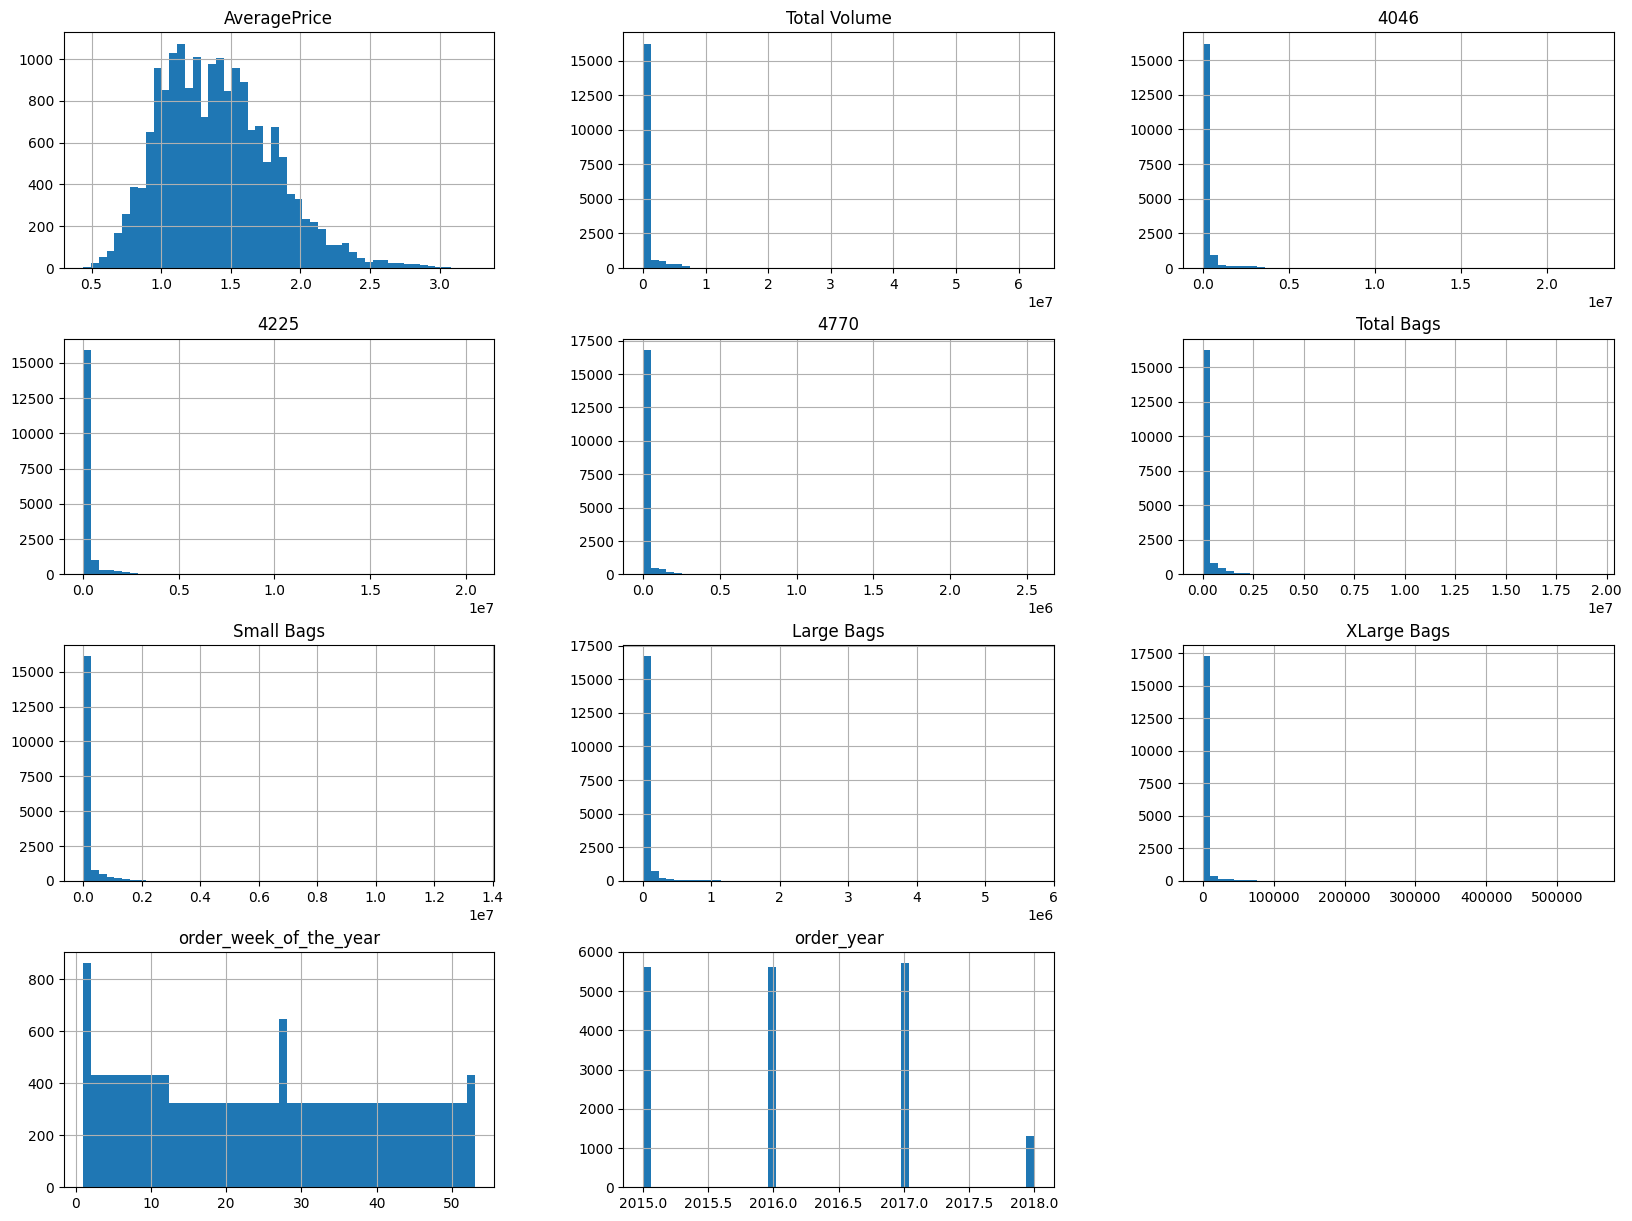

In [ ]:
# Representamos gráficamente la distribución de los atributos
df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
# Transformamos los valores del atributo type de categoricos a numericos
labelencoder = LabelEncoder()
df["type"] = labelencoder.fit_transform(df["type"])
df

# Transformamos los valores del atributo region de categoricos a numericos
labelencoder = LabelEncoder()
df["region"] = labelencoder.fit_transform(df["region"])
df

# Transformamos los valores del atributo season de categoricos a numericos
labelencoder = LabelEncoder()
df["season"] = labelencoder.fit_transform(df["season"])
df

# Transformamos los valores del atributo order_month de categoricos a numericos
labelencoder = LabelEncoder()
df["order_month"] = labelencoder.fit_transform(df["order_month"])
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,order_month,order_week_of_the_year,order_year,season
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,2,52,2015,3
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,2,51,2015,3
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,2,50,2015,3
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,2,49,2015,3
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,9,48,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,53,3,5,2018,3
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,53,4,4,2018,3
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,53,4,3,2018,3
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,53,4,2,2018,3


In [ ]:
#Mostramos correlación lineal entre todos los atributos del conjunto de datos
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,order_month,order_week_of_the_year,order_year,season
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,-0.011716,0.119089,0.146383,0.093197,-0.162649
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.174176,-0.012003,-0.024217,0.017193,0.017581
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.192073,-0.013348,-0.026268,0.003353,0.016116
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,0.145726,-0.008662,-0.019965,-0.009559,0.016162
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,0.095252,-0.012535,-0.032542,-0.036531,0.016613
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.175256,-0.012969,-0.023189,0.071552,0.019349
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.164702,-0.013886,-0.023766,0.063915,0.019194
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.198768,-0.008635,-0.019949,0.087891,0.017463
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.082281,-0.018272,-0.015233,0.081033,0.028247
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000280,0.000038,-0.000079,-0.000032,-0.000114


En la siguiente instrucción podemos ver que las correlaciones que hay entre AveragePrice y el resto de variables. Type tiene una correlación de 61%:

In [ ]:
# Mostrar la correlación entre los atributos del conjunto de datos
corr_matrix = df.corr()
corr_matrix["AveragePrice"].sort_values(ascending=False)

AveragePrice              1.000000
type                      0.615845
order_week_of_the_year    0.146383
order_month               0.119089
order_year                0.093197
region                   -0.011716
XLarge Bags              -0.117592
season                   -0.162649
4225                     -0.172928
Large Bags               -0.172940
Small Bags               -0.174730
Total Bags               -0.177088
4770                     -0.179446
Total Volume             -0.192752
4046                     -0.208317
Name: AveragePrice, dtype: float64

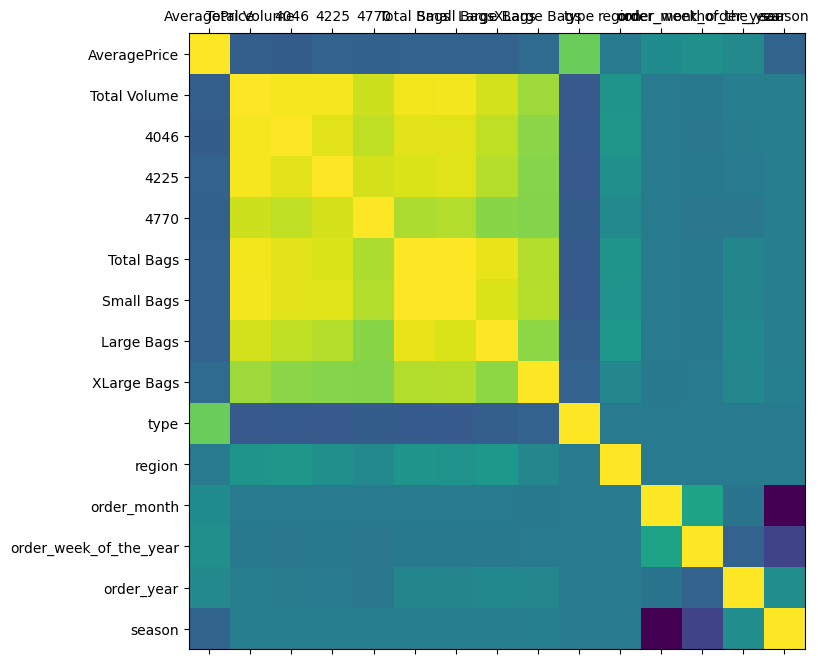

In [ ]:
# Representar gráficamente la matriz de correlación
corr = df.corr()
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);

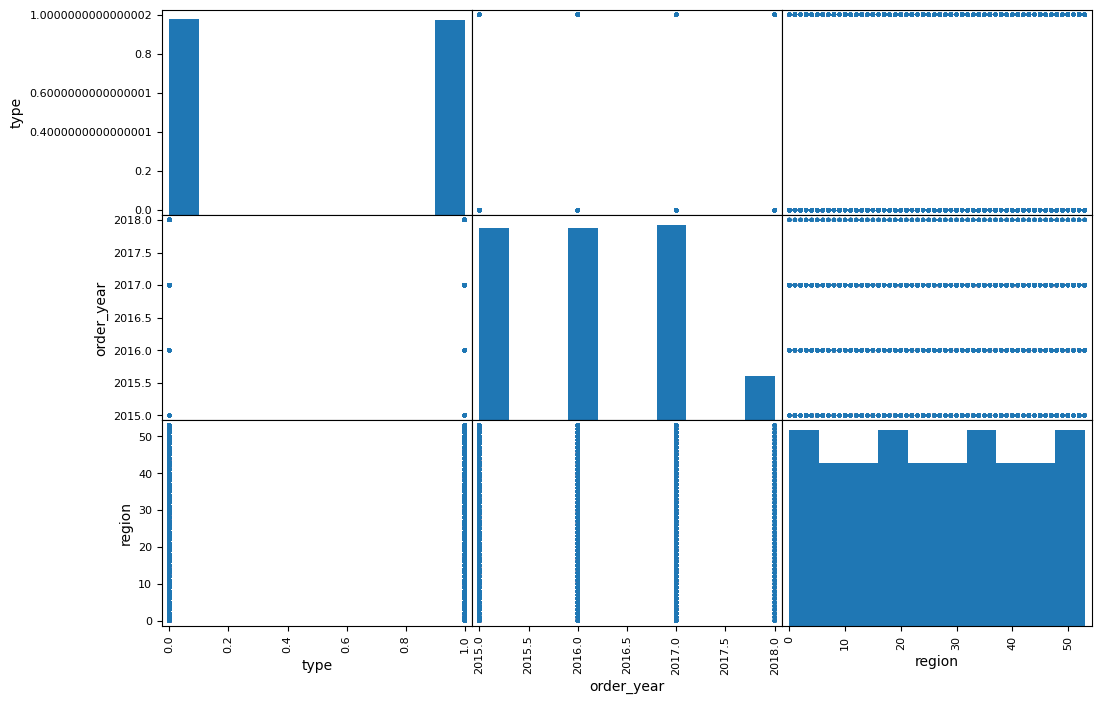

In [ ]:
# Correlaciones representadas gráficamente
atributos = ["type", "order_year", "region"]

scatter_matrix(df[atributos], figsize=(12, 8))
plt.show()

##3. Division del conjunto de datos

In [ ]:
# División del conjunto de datos 70/30 ya que son mas que 1000 datos
train_set, test_set = train_test_split(df, test_size=0.3, random_state=42)

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12774 entries, 8704 to 15795
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AveragePrice            12774 non-null  float64
 1   Total Volume            12774 non-null  float64
 2   4046                    12774 non-null  float64
 3   4225                    12774 non-null  float64
 4   4770                    12774 non-null  float64
 5   Total Bags              12774 non-null  float64
 6   Small Bags              12774 non-null  float64
 7   Large Bags              12774 non-null  float64
 8   XLarge Bags             12774 non-null  float64
 9   type                    12774 non-null  int64  
 10  region                  12774 non-null  int64  
 11  order_month             12774 non-null  int64  
 12  order_week_of_the_year  12774 non-null  int64  
 13  order_year              12774 non-null  int64  
 14  season                  12774 non-n

In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5475 entries, 8604 to 898
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AveragePrice            5475 non-null   float64
 1   Total Volume            5475 non-null   float64
 2   4046                    5475 non-null   float64
 3   4225                    5475 non-null   float64
 4   4770                    5475 non-null   float64
 5   Total Bags              5475 non-null   float64
 6   Small Bags              5475 non-null   float64
 7   Large Bags              5475 non-null   float64
 8   XLarge Bags             5475 non-null   float64
 9   type                    5475 non-null   int64  
 10  region                  5475 non-null   int64  
 11  order_month             5475 non-null   int64  
 12  order_week_of_the_year  5475 non-null   int64  
 13  order_year              5475 non-null   int64  
 14  season                  5475 non-null 

In [ ]:
# Separamos las características de entrada de la característica de salida
X_train = train_set.drop("AveragePrice", axis=1)
y_train = train_set["AveragePrice"].copy()

X_test = test_set.drop("AveragePrice", axis=1)
y_test = test_set["AveragePrice"].copy()

#Modelo Regresión Lineal Múltiple


In [ ]:
#Escogeremos las categorias de entrada
X_train_mult = X_train[['type','Total Volume', '4046']]
X_test_mult = X_test[['type','Total Volume', '4046']]

# las transformamos en arreglo de 2 dimensiones
X_train_mult2D = X_train_mult.values
X_test_mult2D = X_test_mult.values

In [ ]:
# COnstrucción del modelo y ajuste de la función hipótesis
lin_regMult = LinearRegression()
lin_regMult.fit(X_train_mult2D, y_train)

LinearRegression()

In [ ]:
#Hacemos las predicciones
y_pred = lin_regMult.predict(X_test_mult2D)
y_pred

array([1.16349679, 1.14911481, 1.65549178, ..., 1.65543244, 1.65596503,
       1.17608175])

In [ ]:
lin_regMult.score(X_test_mult2D, y_test)

0.37444765634184374

In [ ]:
# Salvar el modelo en archivo .pkl
joblib.dump(lin_regMult, "09PrecioAguacate.pkl")

['09PrecioAguacate.pkl']

In [ ]:
# Cargar modelo
regLinealCargado = joblib.load("09PrecioAguacate.pkl")

#Conclusión
En esta primera versión del modelo nos ha quedado un modelo bastante malo con solo un 35% de presición. Aplicar escalado a los datos tal vez podría mejorar un poco el score, o también cambiar el algoritmo de Machine Learning.